# **Importing Necessary Libraries & Modules**

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **DataSet Handeling and Preprocessing**

In [ ]:
# Navigate to the dataset directory
os.chdir('../')
os.chdir('../')
dataset_path ="SET-24/Datasets/Kaggle_Dataset"

**Genearating Training Dataset**

In [ ]:
# Define input size and batch size
input_size = 128
batch_size_num = 32
# Define the path to the training data
train_path = os.path.join(dataset_path, "Train")
# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1 / 255,# Rescale pixel values to [0,1] by dividing by 255
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)
# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(input_size, input_size),
    color_mode="rgb",
    class_mode="binary",# Since it's binary classification
    batch_size=batch_size_num,
    shuffle=True, # Shuffle the data
)

Found 40000 images belonging to 2 classes.


**Generating Validation Dataset**

In [ ]:
input_size = 128
batch_size_num = 32
# Define the path to the validation data
val_path = os.path.join(dataset_path, "Validation")
# Data augmentation and preprocessing for validation data
val_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_generator = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=(input_size, input_size),
    color_mode="rgb",
    class_mode="binary",
    batch_size=batch_size_num,
    shuffle=True,
)

Found 20000 images belonging to 2 classes.


# **Model Creation**

**Importing InceptionV3 model**

In [ ]:
inception_model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,# Exclude the fully-connected layers at the top
    weights='imagenet',# Initialize weights with pre-trained ImageNet weights
    input_tensor=None,
    input_shape=(128,128,3),# Define input shape
    pooling=None,
    classes=1000, # Number of classes for the pre-trained model (not used in this case)
    classifier_activation='softmax' # Activation function for the final softmax layer
)

**Model Architecture**

In [ ]:
# Define the rest of the model architecture on top of the InceptionV3 bas
x = layers.Flatten()(inception_model.output)
x = layers.Dense(units=512, activation = "relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(units=512, activation = "relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(units=64, activation = "relu")(x)
x = layers.Dense(units=1, activation = "sigmoid")(x)
# Create the final model
model = Model(inception_model.input,x)
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",# Binary cross-entropy loss for binary classification
    metrics=["accuracy"],
)

**Defining Callbacks**

In [ ]:
# Define directory to save models
model_dir = "SET-24\\Datasets\\Models"
model_path = os.path.join(model_dir)
# Define callbacks for early stopping and saving the best model
custom_callbacks = [
    EarlyStopping(monitor="val_loss", mode="min", patience=3, verbose=1),
    ModelCheckpoint(
        filepath=os.path.join(model_path,"best_model_inception.keras"),
        monitor="val_loss",
        mode="min",
        verbose=1,
        save_best_only=True,
    ),
]

# **Model Training**

In [ ]:
num_epochs = 10
# Train the model
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator,
    callbacks=custom_callbacks,
)

Epoch 1/6


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:123: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7805 - loss: 0.4374
Epoch 1: val_loss improved from inf to 0.17495, saving model to SET-24\Datasets\Models\best_model_inception.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3308s 3s/step - accuracy: 0.7806 - loss: 0.4372 - val_accuracy: 0.9390 - val_loss: 0.1750
Epoch 2/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9564 - loss: 0.1170
Epoch 2: val_loss improved from 0.17495 to 0.10336, saving model to SET-24\Datasets\Models\best_model_inception.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3090s 2s/step - accuracy: 0.9564 - loss: 0.1170 - val_accuracy: 0.9650 - val_loss: 0.1034
Epoch 3/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9660 - loss: 0.0880
Epoch 3: val_loss did not improve from 0.10336
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3190s 3s/step - accuracy: 0.9660 - loss: 0.0880 - val_accuracy: 0.9566 - val_loss: 0.1205
Epoch 4/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9729 - loss: 0.0739
Epoch 4: val_loss did no

# **Model Saving and Loading**

In [ ]:
# Load the best trained InceptionV3-based model
b_model = load_model(os.path.join(model_path,"best_model_inception.keras"))

In [ ]:
# Define directory to save the final model
final_model_dir = "SET-24\\Models"
final_model_path = os.path.join(final_model_dir)
# Save the best model to the final model directory
best_model.save(os.path.join(final_model_path,"best_inception_model.keras"))

In [ ]:
# Load the saved best model from the final model directory
best_model = load_model(os.path.join(final_model_path,"best_inception_model.keras"))

# **Model Testing and Report Generating**

**Generating Test Dataset**

In [ ]:
# Define the path to the test data
test_path = os.path.join(dataset_path, "Test")
# Data augmentation and preprocessing for test data
test_datagen = ImageDataGenerator(
    rescale=1 / 255
)
# Create a generator for test data
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    classes=["fake", "real"],
    target_size=(input_size, input_size),
    color_mode="rgb",
    class_mode=None,
    batch_size=1,
    shuffle=False,
)

Found 2000 images belonging to 2 classes.


**Test Data Prediction**

In [ ]:
# Reset the generator to ensure consistent order of predictions
test_generator.reset()
# Predict labels for the test data using the best model
prediction =model.predict(test_generator, verbose=1)
# Create a DataFrame to store test results
test_results = pd.DataFrame(
    {"Filename": test_generator.filenames, "Prediction": prediction.flatten()}
)
print(test_results)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 110s 55ms/step
               Filename    Prediction
0       fake\fake_0.jpg  2.037313e-01
1       fake\fake_1.jpg  8.683741e-01
2      fake\fake_10.jpg  2.170393e-07
3     fake\fake_100.jpg  1.802543e-05
4     fake\fake_101.jpg  9.430453e-01
...                 ...           ...
1995  real\real_995.jpg  1.000000e+00
1996  real\real_996.jpg  1.000000e+00
1997  real\real_997.jpg  1.000000e+00
1998  real\real_998.jpg  1.000000e+00
1999  real\real_999.jpg  9.999997e-01

[2000 rows x 2 columns]


**Model Metrics**

[0 0 0 ... 1 1 1]
[0 1 0 ... 1 1 1]
[[885 115]
 [ 46 954]]


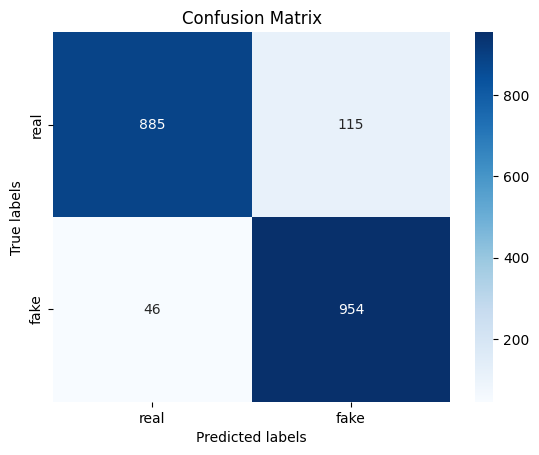

In [ ]:
# Compute confusion matrix
y_true = test_generator.classes
print(y_true)
y_pred = np.array([0 if pred < 0.7 else 1 for pred in prediction.flatten()])
print(y_pred)
cm = confusion_matrix(y_true, y_pred)
print(cm)
# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="d")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["real", "fake"])
ax.yaxis.set_ticklabels(["real", "fake"])
plt.show()

In [ ]:
# Print classification report
print(classification_report(y_true, y_pred, target_names=["real", "fake"]))

              precision    recall  f1-score   support

        real       0.95      0.89      0.92      1000
        fake       0.89      0.95      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

